#### Automating Crypto Website API with Python

##### I used coinmarketcap.com API and use the key by creating an account on coinmarketcap
###### The QuickStart is available on the documentation of coinmarketcap and copied the code for Python. Also, changed the API to pro-api from Documentation at url

In [35]:
# Copied from coinmarketcap for startup with my Key Generated.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

import os
from time import time
from time import sleep

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',        #limit set 10 rows only instead of 5000
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd2b7c480-63ac-450f-b30e-df38c0b56c7a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# [jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10] Used this to increase the Jupyter Notebook limit

{'status': {'timestamp': '2023-04-08T22:59:52.506Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10147, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

###### Normalize the data as it is currently in Json so that later visulization can be interpreted easily with clear columns and data.

In [2]:
print (type (data) )

<class 'dict'>


In [3]:
#  Pandas show rows and columns

pd.set_option ('display.max_columns', None)  #Display full column name instead of ...
pd.set_option ('display.max_rows', None)

In [7]:
df = pd.json_normalize (data ['data'] )             #Noramlize Json data

df ['timestamp'] = pd.to_datetime ('now', utc = True)          #Add timestamp column to know when the execution was successful

display (df)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10147,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934087e+07,1.934087e+07,False,NaN,1,None,None,None,2023-04-08T21:41:00.000Z,27924.569293,9.471837e+09,-11.9543,-0.078589,0.155222,-1.959422,37.658865,20.316996,64.429274,5.400854e+11,45.9253,5.864160e+11,None,2023-04-08T21:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:48:08.475486+00:00
1,1027,Ethereum,ETH,ethereum,6706,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,None,None,None,2023-04-08T21:41:00.000Z,1854.987595,5.150474e+09,-36.8187,-0.117984,-0.092077,1.896965,29.168740,11.361665,45.783843,2.234477e+11,19.0001,2.234477e+11,None,2023-04-08T21:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:48:08.475486+00:00
2,825,Tether,USDT,tether,50911,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.019539e+10,8.309174e+10,False,NaN,3,None,None,None,2023-04-08T21:41:00.000Z,1.000246,1.784950e+10,-6.0504,-0.006827,-0.048240,0.016593,0.025859,0.018799,0.032515,8.021514e+10,6.8210,8.311221e+10,None,2023-04-08T21:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-08 21:48:08.475486+00:00
3,1839,BNB,BNB,bnb,1246,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578868e+08,1.578868e+08,False,NaN,4,None,None,None,2023-04-08T21:41:00.000Z,310.987690,4.624369e+08,-1.9671,-0.052276,-0.044810,-1.319063,13.147961,-6.304386,14.895596,4.910084e+10,4.1752,4.910084e+10,None,2023-04-08T21:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:48:08.475486+00:00
4,3408,USD Coin,USDC,usd-coin,11564,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.260051e+10,3.260051e+10,False,NaN,5,None,None,None,2023-04-08T21:41:00.000Z,0.999822,2.330890e+09,-19.0326,0.005602,-0.013242,0.011166,0.001898,-0.015146,-0.032469,3.259471e+10,2.7717,3.259471e+10,None,2023-04-08T21:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-08 21:48:08.475486+00:00
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,None,None,None,2023-04-08T21:41:00.000Z,0.505439,6.138074e+08,-41.5971,-0.338114,-1.377576,-0.941340,37.490635,25.863595,47.880780,2.612535e+10,2.2215,5.054386e+10,None,2023-04-08T21:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:48:08.475486+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.475860e+10,3.566069e+10,False,NaN,7,None,None,None,2023-04-08T21:41:00.000Z,0.384802,2.062415e+08,10.9604,-0.083231,0.781623,-2.401701,25.592789,-2.649565,31.733985,1.337518e+10,1.1373,1.731609e+10,None,2023-04-08T21:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:48:08.475486+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388580e+11,1.388580e+11,False,NaN,8,None,None,None,2023-04-08T21:41:00.000Z,0.081342,5.039369e+08,-46.9846,-0.446496,-1.040758,-0.812952,23.988708,-11.582344,11.894295,1.129494e+10,0.9605,1.129494e+10,None,2023-04-08T21:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:48:08.475486+00:00
8,3890,Polygon,MATIC,polygon,648,2019-04-

###### Now, automate the whole system rather than manually executing them.

In [8]:
def run_api ():
   #API
    global df         # local variable df to global
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd2b7c480-63ac-450f-b30e-df38c0b56c7a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #Normalize
    #Here we append data so that it fits to original data_normalized dataset,hence df defined       
    
    #df_new = pd.json_normalize (data ['data'] )     

    #df_new ['timestamp'] = pd.to_datetime ('now', utc = True)          
    #-------------------df = df.append (df_new)-----------works,but unused code
    #df = pd.concat ([df, df_new])   # Same as append
    
    #Here, original df is used since df_new if used in csv as well, creates duplicates in csv. Thus, foolowing code applied.
    df = pd.json_normalize (data ['data'])
    df['timestamp'] = pd.to_datetime ('now', utc = True) #utc given since it throws error without
    display (df)
    
    
    #Add the df into the csv in the local directory automatically
    if not os.path.isfile ('C:\DataAnalytics\API_Auto.csv'):
        df.to_csv ('C:\DataAnalytics\API_Auto.csv', header = 'column_names')
    else:
        df.to_csv ('C:\DataAnalytics\API_Auto.csv', header = False, mode = 'a')        # mode =a is to append data
    

###### Automate the function

In [6]:
#Script to run it automatically


for i in range (333):                                  #333 as the  coinmarketcap API gives 333 runs a day
    run_api () 
    print ('API successsfully executed!!!')
    sleep (60)                                    #sleep for 60 seconds
exit ()


{'status': {'timestamp': '2023-04-08T21:43:23.278Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10147, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [9]:
# Read the automated csv 

csv_reading = pd.read_csv ('C:\DataAnalytics\API_Auto.csv')
csv_reading

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10147,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.934087e+07,1.934087e+07,False,NaN,1,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,27930.719194,9.476678e+09,-11.8464,-0.110307,0.120111,-1.948086,37.054131,20.194508,64.509624,5.402044e+11,45.9205,5.865451e+11,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
1,1,1027,Ethereum,ETH,ethereum,6706,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1854.985854,5.143659e+09,-36.9347,-0.170727,-0.190929,1.878262,28.680565,11.199379,45.954899,2.234475e+11,18.9937,2.234475e+11,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
2,2,825,Tether,USDT,tether,50911,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.019539e+10,8.309174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.000338,1.782040e+10,-6.2110,-0.012595,-0.035469,0.000515,0.034284,0.026151,0.038266,8.022248e+10,6.8194,8.311981e+10,NaN,2023-04-08T21:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-08 21:34:49.764797
3,3,1839,BNB,BNB,bnb,1246,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578868e+08,1.578868e+08,False,NaN,4,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,311.007603,4.614982e+08,-2.5073,-0.058296,-0.058450,-1.334555,12.883924,-6.433583,15.128884,4.910399e+10,4.1744,4.910399e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
4,4,3408,USD Coin,USDC,usd-coin,11564,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.260051e+10,3.260051e+10,False,NaN,5,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.999878,2.331876e+09,-19.0682,-0.006781,-0.008295,0.004562,-0.009885,-0.025464,-0.018494,3.259654e+10,2.7709,3.259654e+10,NaN,2023-04-08T21:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-08 21:34:49.764797
5,5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.505657,6.145466e+08,-41.5095,-0.275966,-1.479185,-0.869266,37.034333,25.746451,47.970930,2.613666e+10,2.2219,5.056574e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.475860e+10,3.566069e+10,False,NaN,7,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.385076,2.062574e+08,10.7077,-0.026888,0.769134,-2.313157,25.190151,-2.694991,32.077295,1.338470e+10,1.1378,1.732842e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
7,7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.388580e+11,1.388580e+11,False,NaN,8,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.081407,5.030727e+08,-47.4375,-0.089861,-1.045717,-0.500765,23.379891,-11.617300,12.196693,1.130408e+10,0.9609,1.130408e+10,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
8,8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-soluti

 ##### Data Cleaning

In [13]:
# Columns circulating_supply, total_supply data are scientific, hence converting to more readable format.

pd.set_option ('display.float_format', lambda x: '%.2f' % x)  #lambda to transform or calculate elements or columns
display (csv_reading)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10147,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19340868.00,19340868.00,False,NaN,1,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,27930.72,9476678268.64,-11.85,-0.11,0.12,-1.95,37.05,20.19,64.51,540204353068.39,45.92,586545103065.50,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
1,1,1027,Ethereum,ETH,ethereum,6706,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120457776.00,120457776.00,False,NaN,2,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1854.99,5143659066.88,-36.93,-0.17,-0.19,1.88,28.68,11.20,45.95,223447470484.65,18.99,223447470484.65,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
2,2,825,Tether,USDT,tether,50911,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80195385809.39,83091735571.87,False,NaN,3,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.00,17820398524.44,-6.21,-0.01,-0.04,0.00,0.03,0.03,0.04,80222477748.13,6.82,83119805967.53,NaN,2023-04-08T21:32:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-08 21:34:49.764797
3,3,1839,BNB,BNB,bnb,1246,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157886767.39,157886767.39,False,NaN,4,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,311.01,461498190.26,-2.51,-0.06,-0.06,-1.33,12.88,-6.43,15.13,49103985021.56,4.17,49103985021.56,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
4,4,3408,USD Coin,USDC,usd-coin,11564,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32600512573.75,32600512573.75,False,NaN,5,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.00,2331876490.49,-19.07,-0.01,-0.01,0.00,-0.01,-0.03,-0.02,32596539256.45,2.77,32596539256.45,NaN,2023-04-08T21:32:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-08 21:34:49.764797
5,5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,51688470797.00,99989014677.00,False,NaN,6,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.51,614546591.86,-41.51,-0.28,-1.48,-0.87,37.03,25.75,47.97,26136656751.87,2.22,50565738062.79,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,34758598386.96,35660688966.54,False,NaN,7,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.39,206257425.29,10.71,-0.03,0.77,-2.31,25.19,-2.69,32.08,13384700377.97,1.14,17328417858.03,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
7,7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138858036383.71,138858036383.71,False,NaN,8,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,0.08,503072664.56,-47.44,-0.09,-1.05,-0.50,23.38,-11.62,12.20,11304083656.15,0.96,11304083656.15,NaN,2023-04-08T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-08 21:34:49.764797
8,8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00,9164469069.28,10000000000.00,False,NaN,9,NaN,NaN,NaN,2023-04-08T21:32:00.000Z,1.11,139004572.53,-29.86,-0.18,-0.15,-0.30,9.46,-12.34,34.86,10129446590.50,

In [15]:
 #Group the Names of Crypto currencies

grouped_data = csv_reading.groupby ('name', sort = False) [['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean ()
grouped_data

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.09,0.12,-1.96,37.39,20.25,64.47
Ethereum,-0.14,-0.15,1.87,28.95,11.29,45.83
Tether,-0.02,-0.05,0.01,0.03,0.02,0.03
BNB,-0.04,-0.06,-1.32,12.99,-6.35,14.99
USD Coin,-0.01,-0.02,0.01,-0.00,-0.02,-0.03
XRP,-0.31,-1.47,-0.94,37.21,25.80,47.92
Cardano,-0.04,0.76,-2.37,25.36,-2.69,31.86
Dogecoin,-0.29,-1.06,-0.73,23.65,-11.62,11.97
Polygon,-0.14,-0.07,-0.30,9.83,-12.25,34.90


In [17]:
# Change the row and column
stacked = grouped_data.stack ()             #stack converts the columns to rows
stacked

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.09
          quote.USD.percent_change_24h     0.12
          quote.USD.percent_change_7d     -1.96
          quote.USD.percent_change_30d    37.39
          quote.USD.percent_change_60d    20.25
          quote.USD.percent_change_90d    64.47
Ethereum  quote.USD.percent_change_1h     -0.14
          quote.USD.percent_change_24h    -0.15
          quote.USD.percent_change_7d      1.87
          quote.USD.percent_change_30d    28.95
          quote.USD.percent_change_60d    11.29
          quote.USD.percent_change_90d    45.83
Tether    quote.USD.percent_change_1h     -0.02
          quote.USD.percent_change_24h    -0.05
          quote.USD.percent_change_7d      0.01
          quote.USD.percent_change_30d     0.03
          quote.USD.percent_change_60d     0.02
          quote.USD.percent_change_90d     0.03
BNB       quote.USD.percent_change_1h     -0.04
          quote.USD.percent_change_24h    -0.06
 

In [19]:
type (stacked)   #Stack also converts the df to series

pandas.core.series.Series

In [23]:
# give a frame

value_stacked = stacked.to_frame (name = 'values')
value_stacked

values
name                                         
Bitcoin  quote.USD.percent_change_1h    -0.09
         quote.USD.percent_change_24h    0.12
         quote.USD.percent_change_7d    -1.96
         quote.USD.percent_change_30d   37.39
         quote.USD.percent_change_60d   20.25
         quote.USD.percent_change_90d   64.47
Ethereum quote.USD.percent_change_1h    -0.14
         quote.USD.percent_change_24h   -0.15
         quote.USD.percent_change_7d     1.87
         quote.USD.percent_change_30d   28.95
         quote.USD.percent_change_60d   11.29
         quote.USD.percent_change_90d   45.83
Tether   quote.USD.percent_change_1h    -0.02
         quote.USD.percent_change_24h   -0.05
         quote.USD.percent_change_7d     0.01
         quote.USD.percent_change_30d    0.03
         quote.USD.percent_change_60d    0.02
         quote.USD.percent_change_90d    0.03
BNB      quote.USD.percent_change_1h    -0.04
         quote.USD.percent_change_24h   -0.06
         quote.USD.percent_change_7d    -1.32
         quote.USD.percent_change_30d   12.99
         quote.USD.percent_change_60d   -6.35
         quote.USD.percent_change_90d   14.99
USD Coin quote.USD.percent_change_1h    -0.01
         quote.USD.percent_change_24h   -0.02
         quote.USD.percent_change_7d     0.01
         quote.USD.percent_change_30d   -0.00
         quote.USD.percent_change_60d   -0.02
         quote.USD.percent_change_90d   -0.03
XRP      quote.USD.percent_change_1h    -0.31
         quote.USD.percent_change_24h   -1.47
         quote.USD.percent_change_7d    -0.94
         quote.USD.percent_change_30d   37.21
         quote.USD.percent_change_60d   25.80
         quote.USD.percent_change_90d   47.92
Cardano  quote.USD.percent_change_1h    -0.04
         quote.USD.percent_change_24h    0.76
         quote.USD.percent_change_7d    -2.37
         quote.USD.percent_change_30d   25.36
         quote.USD.percent_change_60d   -2.69
         quote.USD.percent_change_90d   31.86
Dogecoin quote.USD.percent_change_1h    -0.29
         quote.USD.percent_change_24h   -1.06
         quote.USD.percent_change_7d    -0.73
         quote.USD.percent_change_30d   23.65
         quote.USD.percent_change_60d  -11.62
         quote.USD.percent_change_90d   11.97
Polygon  quote.USD.percent_change_1h    -0.14
         quote.USD.percent_change_24h   -0.07
         quote.USD.percent_change_7d    -0.30
         quote.USD.percent_change_30d    9.83
         quote.USD.percent_change_60d  -12.25
         quote.USD.percent_change_90d   34.90
Solana   quote.USD.percent_change_1h    -0.28
         quote.USD.percent_change_24h   -1.32
         quote.USD.percent_change_7d    -4.30
         quote.USD.percent_change_30d   17.34
         quote.USD.percent_change_60d  -14.72
         quote.USD.percent_change_90d   46.34

In [28]:
print (type (value_stacked) )
print ( 'COUNT = ', value_stacked.count () )

<class 'pandas.core.frame.DataFrame'>
COUNT =  values    60
dtype: int64


In [32]:
# Adding Index to value_stacked

index = pd.Index (range (60) )

index_df = value_stacked.reset_index ()
index_df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09
1,Bitcoin,quote.USD.percent_change_24h,0.12
2,Bitcoin,quote.USD.percent_change_7d,-1.96
3,Bitcoin,quote.USD.percent_change_30d,37.39
4,Bitcoin,quote.USD.percent_change_60d,20.25
5,Bitcoin,quote.USD.percent_change_90d,64.47
6,Ethereum,quote.USD.percent_change_1h,-0.14
7,Ethereum,quote.USD.percent_change_24h,-0.15
8,Ethereum,quote.USD.percent_change_7d,1.87
9,Ethereum,quote.USD.percent_change_30d,28.95


In [52]:
# Rename the column level_1
renamed = index_df.rename (columns = {'level_1': 'change_percent'} )
renamed

,name,change_percent,values
0,Bitcoin,quote.USD.percent_change_1h,-0.09
1,Bitcoin,quote.USD.percent_change_24h,0.12
2,Bitcoin,quote.USD.percent_change_7d,-1.96
3,Bitcoin,quote.USD.percent_change_30d,37.39
4,Bitcoin,quote.USD.percent_change_60d,20.25
5,Bitcoin,quote.USD.percent_change_90d,64.47
6,Ethereum,quote.USD.percent_change_1h,-0.14
7,Ethereum,quote.USD.percent_change_24h,-0.15
8,Ethereum,quote.USD.percent_change_7d,1.87
9,Ethereum,quote.USD.percent_change_30d,28.95


#### Visualization using Matplotlib and Seaborn

In [72]:
# Change the column names so the x-labels are clear

renamed ['change_percent'] = renamed['change_percent'].replace (['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1hr', '24hr', '7days', '30days', '60days', '90days'])
renamed

,name,change_percent,values
0,Bitcoin,1hr,-0.09
1,Bitcoin,24hr,0.12
2,Bitcoin,7days,-1.96
3,Bitcoin,30days,37.39
4,Bitcoin,60days,20.25
5,Bitcoin,90days,64.47
6,Ethereum,1hr,-0.14
7,Ethereum,24hr,-0.15
8,Ethereum,7days,1.87
9,Ethereum,30days,28.95


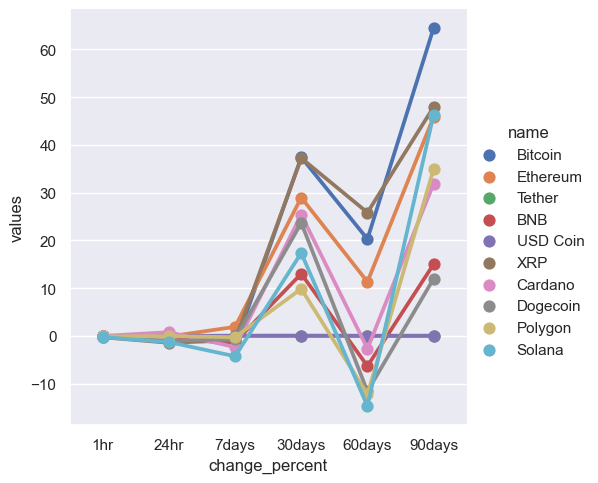

In [86]:

show_changes = sns.catplot(x='change_percent', y='values', data=renamed, hue='name', kind = 'point')
show_changes
